# EDA For Offensive Language Classification

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from collections import Counter
nltk.download('stopwords')

from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/balamurugan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Lets import the tamil dataset 

In [89]:
df = pd.read_csv('Dataset/tamil_offensive_full_train.csv')

df.head()

,Text,Labels
0,movie vara level la Erika poguthu,Not_offensive
1,I love Ajith Kumar Vivegam movie inki mjy bht achi lgi,not-Tamil
2,Padam nalla comedy padama irukum polaye..,Not_offensive
3,karthick subburaj anne .... intha padam vetri adaya unagalukku ennudaya valthukkal...,Not_offensive
4,கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁,Not_offensive


### Now lets check for null

In [90]:
df.isnull().sum()

Text      0
Labels    0
dtype: int64

So the data is clean without any null values

### Lets check for the classes

In [75]:
set(df['Labels'])

{'Not_offensive',
 'Offensive_Targeted_Insult_Group',
 'Offensive_Targeted_Insult_Individual',
 'Offensive_Targeted_Insult_Other',
 'Offensive_Untargetede',
 'not-Tamil'}

We have 6 main classes but they wanted output to be 4 classes

In [76]:
print('Not_offensive: ')
print(df[df['Labels']=='Not_offensive'].head(5)['Text'].values[:],"\n")
print('Offensive_Targeted_Insult_Group: ')
print(df[df['Labels']=='Offensive_Targeted_Insult_Group'].head(5)['Text'].values[:],"\n")
print('Offensive_Targeted_Insult_Individual: ')
print(df[df['Labels']=='Offensive_Targeted_Insult_Individual'].head(5)['Text'].values[:],"\n")
print('Offensive_Targeted_Insult_Other: ')
print(df[df['Labels']=='Offensive_Targeted_Insult_Other'].head(5)['Text'].values[:],"\n")
print('Offensive_Untargetede: ')
print(df[df['Labels']=='Offensive_Untargetede'].head(5)['Text'].values[:],"\n")
print('not-Tamil: ')
print(df[df['Labels']=='not-Tamil'].head(5)['Text'].values[:],"\n")

Not_offensive: 
['movie vara level la Erika poguthu'
 'Padam nalla comedy padama irukum polaye..'
 'karthick subburaj anne .... intha padam vetri adaya unagalukku ennudaya valthukkal...'
 'கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁'
 'ippo intha trailer ah parkuravana oru like podunga'] 

Offensive_Targeted_Insult_Group: 
['Dei Rajini pavam da ne varaven poraven ellam karithuppatha koraiya pesittu erukkan 1:58'
 'Dey dey deyyy,, loosu pasangala,, munna pinna jayalalitha amma va pathrukingalada gambeeramna ennanu avanga kannula tha paakanum,, amma oda history ah ithu,, soniya gandhi mari iruku chaiiii,,, avanga bio edukanumna a-z pathutu vanthu edungadaa,, dummy akkaathinga'
 'தமிழ் நாட்ல இருக்குற சாதிய பைத்தியகார கூதியானுங்கள எல்லாம் ஓரே இடத்தில் பார்க்க ஒரு வாய்ப்பை தந்த மோகன் வன்னிக்கு சாரி பன்னிக்கு நன்றிகள்'
 'Comali 9looks teaser la varave Ella'
 'Friend nu FB la Like Kudukkara Friend  dunu nenachiya life be kudukkanu da'] 

Offensive_Targeted_Insult_Individual: 
['Naaa ara

### Now lets try to clean the data

In [77]:
stw = stopwords.words('english')

In [78]:

def clean(text):
    # Convert to lowercase
    text = text.lower()
    
    # Keep only English letters and spaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove stopwords if stw is defined
    text = " ".join([word for word in text.split() if word not in stw])
    
    return text

In [79]:
%%time
print("Before Clean: \n",df.head()['Text'].values[:])
df['Text'] = df['Text'].apply(clean)
df = df[df['Text'] != '']
print("After Clean: \n",df.head()['Text'].values[:])

Before Clean: 
 ['movie vara level la Erika poguthu'
 'I love Ajith Kumar Vivegam movie inki mjy bht achi lgi'
 'Padam nalla comedy padama irukum polaye..'
 'karthick subburaj anne .... intha padam vetri adaya unagalukku ennudaya valthukkal...'
 'கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁']
After Clean: 
 ['movie vara level la erika poguthu'
 'love ajith kumar vivegam movie inki mjy bht achi lgi'
 'padam nalla comedy padama irukum polaye'
 'karthick subburaj anne intha padam vetri adaya unagalukku ennudaya valthukkal'
 'ippo intha trailer ah parkuravana oru like podunga']
CPU times: user 425 ms, sys: 6.44 ms, total: 431 ms
Wall time: 431 ms


### Now lets check for Term Frequency analysis

In [80]:
def corpus(text):
    text_list = text.split()
    return text_list

In [81]:
df['Text_list'] = df['Text'].apply(corpus)
df.head(10)

,Text,Labels,Text_list
0,movie vara level la erika poguthu,Not_offensive,"[movie, vara, level, la, erika, poguthu]"
1,love ajith kumar vivegam movie inki mjy bht achi lgi,not-Tamil,"[love, ajith, kumar, vivegam, movie, inki, mjy, bht, achi, lgi]"
2,padam nalla comedy padama irukum polaye,Not_offensive,"[padam, nalla, comedy, padama, irukum, polaye]"
3,karthick subburaj anne intha padam vetri adaya unagalukku ennudaya valthukkal,Not_offensive,"[karthick, subburaj, anne, intha, padam, vetri, adaya, unagalukku, ennudaya, valthukkal]"
5,ippo intha trailer ah parkuravana oru like podunga,Not_offensive,"[ippo, intha, trailer, ah, parkuravana, oru, like, podunga]"
6,en thalaivan yogi babu irukkaar padam vera level laa irukkum,Not_offensive,"[en, thalaivan, yogi, babu, irukkaar, padam, vera, level, laa, irukkum]"
7,nerkonda parvai sema sema sema trailer,Not_offensive,"[nerkonda, parvai, sema, sema, sema, trailer]"
9,vara level,Not_offensive,"[vara, level]"
10,correct enga apa military da oodi vilaiyada solli tharuvaaaayaa,Offensive_Targeted_Insult_Other,"[correct, enga, apa, military, da, oodi, vilaiyada, solli, tharuvaaaayaa]"
11,dislike pottavan ratham khaki dha savan,Not_offensive,"[dislike, pottavan, ratham, khaki, dha, savan]"


### Lets convert it into list of words
- To Analyse the frequancy for offensive

In [82]:
offdf = df[(df['Labels']!='Not_offensive') & (df['Labels']!='not-malayalam')]
offdf.head(5)

,Text,Labels,Text_list
1,love ajith kumar vivegam movie inki mjy bht achi lgi,not-Tamil,"[love, ajith, kumar, vivegam, movie, inki, mjy, bht, achi, lgi]"
10,correct enga apa military da oodi vilaiyada solli tharuvaaaayaa,Offensive_Targeted_Insult_Other,"[correct, enga, apa, military, da, oodi, vilaiyada, solli, tharuvaaaayaa]"
17,dei rajini pavam da ne varaven poraven ellam karithuppatha koraiya pesittu erukkan,Offensive_Targeted_Insult_Group,"[dei, rajini, pavam, da, ne, varaven, poraven, ellam, karithuppatha, koraiya, pesittu, erukkan]"
20,dey dey deyyy loosu pasangala munna pinna jayalalitha amma va pathrukingalada gambeeramna ennanu avanga kannula tha paakanum amma oda history ah ithu soniya gandhi mari iruku chaiiii avanga bio edukanumna az pathutu vanthu edungadaa dummy akkaathinga,Offensive_Targeted_Insult_Group,"[dey, dey, deyyy, loosu, pasangala, munna, pinna, jayalalitha, amma, va, pathrukingalada, gambeeramna, ennanu, avanga, kannula, tha, paakanum, amma, oda, history, ah, ithu, soniya, gandhi, mari, iruku, chaiiii, avanga, bio, edukanumna, az, pathutu, vanthu, edungadaa, dummy, akkaathinga]"
23,intha maari comments ku like kekuravangala india va vittu veliya annupanum,Offensive_Untargetede,"[intha, maari, comments, ku, like, kekuravangala, india, va, vittu, veliya, annupanum]"


In [83]:
corpus = []
for i in range(offdf.shape[0]):
    corpus += offdf['Text_list'].iloc[i]
len(corpus)

85204

In [84]:
corpus[:10]

['love',
 'ajith',
 'kumar',
 'vivegam',
 'movie',
 'inki',
 'mjy',
 'bht',
 'achi',
 'lgi']

In [85]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('da', 1101),
 ('la', 799),
 ('trailer', 772),
 ('padam', 743),
 ('like', 662),
 ('ah', 660),
 ('movie', 601),
 ('oru', 565),
 ('nu', 505),
 ('ku', 461)]

In [86]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

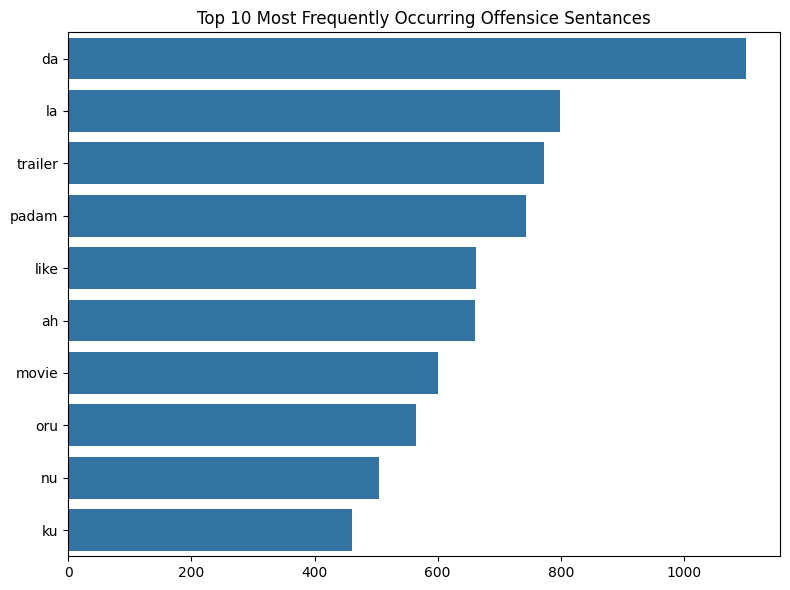

In [87]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occurring Offensice Sentances')

plt.tight_layout()
plt.show()